# Envs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8346737930661208624
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11321147392
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11657633416595457851
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [ ]:
import platform
import tensorflow
import tensorflow.keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(tensorflow.keras.__version__))

Platform: Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
Tensorflow version: 2.7.0
Keras version: 2.7.0


In [ ]:
!python -V
platform.python_version()

Python 3.7.12


'3.7.12'

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#載入資料集


In [ ]:
cd

/root


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
ls

kaggle.json


In [ ]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
cd ../root/.kaggle

/root/.kaggle


In [ ]:
ls

 data/   input/  'kaggle (1).json'   kaggle.json


In [ ]:
!rm -rf root/.kaggle/kaggle.json

In [ ]:
import shutil
shutil.copy("/root/kaggle.json", "/root/.kaggle")

'/root/.kaggle/kaggle.json'

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d gpreda/chinese-mnist

 55% 9.00M/16.5M [00:00<00:00, 33.1MB/s]
100% 16.5M/16.5M [00:00<00:00, 47.2MB/s]


In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks /chinese_mnist_project

/content/drive/MyDrive/Colab_Notebooks /chinese_mnist_project


In [ ]:
!mkdir data

In [ ]:
!mkdir input

In [ ]:
shutil.move("/root/.kaggle/chinese-mnist.zip", "/content/drive/MyDrive/Colab_Notebooks /chinese_mnist_project/input")

'/content/drive/MyDrive/Colab_Notebooks /chinese_mnist_project/input/chinese-mnist.zip'

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks /chinese_mnist_project/input

/content/drive/MyDrive/Colab_Notebooks /chinese_mnist_project/input


In [ ]:
ls

chinese-mnist.zip


In [ ]:
!unzip 'chinese-mnist.zip' -d data

串流輸出內容已截斷至最後 5000 行。
  inflating: data/data/data/input_6_6_5.jpg  
  inflating: data/data/data/input_6_6_6.jpg  
  inflating: data/data/data/input_6_6_7.jpg  
  inflating: data/data/data/input_6_6_8.jpg  
  inflating: data/data/data/input_6_6_9.jpg  
  inflating: data/data/data/input_6_7_1.jpg  
  inflating: data/data/data/input_6_7_10.jpg  
  inflating: data/data/data/input_6_7_11.jpg  
  inflating: data/data/data/input_6_7_12.jpg  
  inflating: data/data/data/input_6_7_13.jpg  
  inflating: data/data/data/input_6_7_14.jpg  
  inflating: data/data/data/input_6_7_15.jpg  
  inflating: data/data/data/input_6_7_2.jpg  
  inflating: data/data/data/input_6_7_3.jpg  
  inflating: data/data/data/input_6_7_4.jpg  
  inflating: data/data/data/input_6_7_5.jpg  
  inflating: data/data/data/input_6_7_6.jpg  
  inflating: data/data/data/input_6_7_7.jpg  
  inflating: data/data/data/input_6_7_8.jpg  
  inflating: data/data/data/input_6_7_9.jpg  
  inflating: data/data/data/input_6_8_1.jpg  
  infla

In [ ]:
#cd C:\Users\user\Desktop\Pipe_Rust_Detection\Data_corrosion_thing_rate\dataset

# 建立檔案路徑

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix

In [ ]:
# load dataset
csv_path = "/content/drive/MyDrive/Colab_Notebooks/chinese_mnist_project/input/data/chinese_mnist.csv"
df= pd.read_csv(csv_path, low_memory = False)
df.head()#csv黨

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [ ]:
# Matchin image names
def file_path_col(df):    
    file_path = f"input_{df[0]}_{df[1]}_{df[2]}.jpg" #input_1_1_10.jpg    
    return file_path

# Create file_path column 將圖片路徑新增到csv黨
df["file_path"] = df.apply(file_path_col, axis = 1)
df.head()

,suite_id,sample_id,code,value,character,file_path
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg


code當作分類答案
![image.png](attachment:image.png)

In [ ]:
df['file_path']

0         input_1_1_10.jpg
1        input_1_10_10.jpg
2         input_1_2_10.jpg
3         input_1_3_10.jpg
4         input_1_4_10.jpg
               ...        
14995     input_99_5_9.jpg
14996     input_99_6_9.jpg
14997     input_99_7_9.jpg
14998     input_99_8_9.jpg
14999     input_99_9_9.jpg
Name: file_path, Length: 15000, dtype: object

In [ ]:
%time
# Step1.1 處理圖片
x_ = np.array(df['file_path'])
y_ = np.array(df['code'])

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


In [ ]:
x_

array(['input_1_1_10.jpg', 'input_1_10_10.jpg', 'input_1_2_10.jpg', ...,
       'input_99_7_9.jpg', 'input_99_8_9.jpg', 'input_99_9_9.jpg'],
      dtype=object)

# sklearn split train validation test "路徑"
以下為train : validation : test = 8 : 1 : 1

In [ ]:
#圖片切分
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split( x_,
                              y_,
                              test_size=0.2,
                              random_state=42)
x_val, x_test, y_val, y_test = train_test_split( x_temp,
                              y_temp,
                              test_size=0.5,
                              random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_val.shape)
print(x_val.shape)
print(y_test.shape)
print(x_test.shape)

(12000,)
(12000,)
(1500,)
(1500,)
(1500,)
(1500,)


# 讀照片

In [ ]:
cd '/content/drive/MyDrive/Colab_Notebooks/chinese_mnist_project/input/data/data/data'

/content/drive/MyDrive/Colab_Notebooks/chinese_mnist_project/input/data/data/data


In [ ]:
#讀取圖片
#(依照剛剛切分完的三個部分做圖片的讀取
import cv2
img_list =[]
for i in x_train:
  img=cv2.imread(i,cv2.IMREAD_GRAYSCALE)
  imgg=cv2.resize(img,(64,64))
  imgg=imgg.astype('uint8')
  imgg=np.expand_dims(imgg, axis=2)
  img_list.append(imgg)
x_train_np=np.array(img_list)

img_list = []
for i in x_val:
  img=cv2.imread(i,cv2.IMREAD_GRAYSCALE)
  imgg=cv2.resize(img,(64,64))
  imgg=imgg.astype('uint8')
  imgg=np.expand_dims(imgg, axis=2)
  img_list.append(imgg)
x_val_np = np.array(img_list)

img_list = []
for i in x_test:
  img=cv2.imread(i,cv2.IMREAD_GRAYSCALE)
  imgg=cv2.resize(img,(64,64))
  imgg=imgg.astype('uint8')
  imgg=np.expand_dims(imgg, axis=2)
  img_list.append(imgg)
x_test_np = np.array(img_list)

In [ ]:
#正則化
x_train_norm = x_train_np.astype('float32')/255
x_val_norm = x_val_np.astype('float32')/255
x_test_norm = x_test_np.astype('float32')/255

In [ ]:
#查看資訊
x_test_np.shape
#查看資訊
#(1500, 64, 64, 1) (總共張數，圖片長，圖片寬，通道) 灰階=1，彩色=3

(1500, 64, 64, 1)

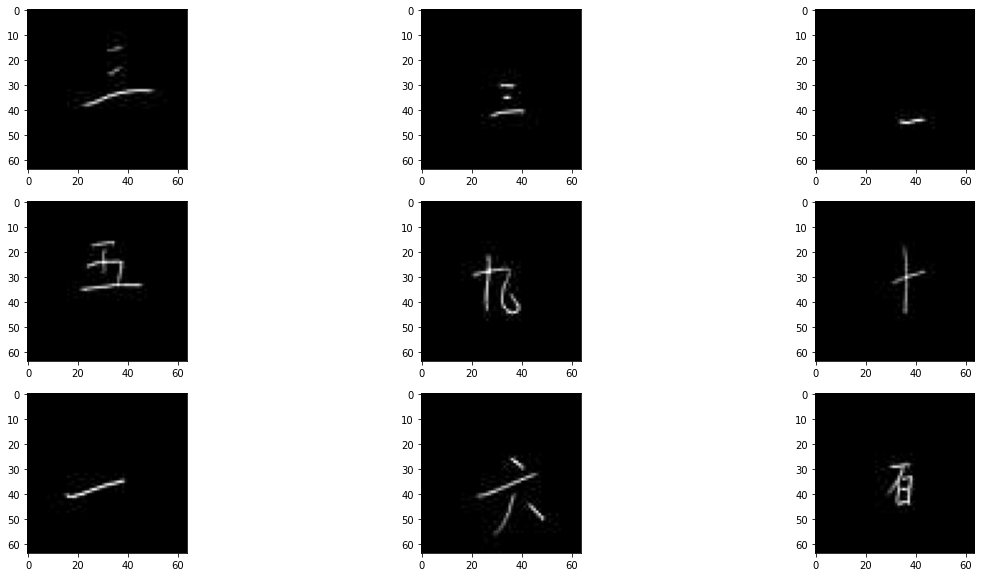

In [ ]:
#將9張訓練的圖片出來看看
fig, ax = plt.subplots(figsize = (20, 10))
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train_np[i,:,:,0],cmap='gray')
plt.show()

In [ ]:
print('x_train: ',x_train_np.shape)
print('y_train: ',y_train.shape)
print('x_val  : ',x_val_np.shape)
print('y_val  : ',y_val.shape)
print('x_test : ',x_test_np.shape)
print('y_test : ',y_test.shape)

x_train:  (12000, 64, 64, 1)
y_train:  (12000,)
x_val  :  (1500, 64, 64, 1)
y_val  :  (1500,)
x_test :  (1500, 64, 64, 1)
y_test :  (1500,)


In [ ]:
from tensorflow.keras.utils import to_categorical

n_class = 16
y_train1 = to_categorical(y_train, n_class)
y_val1 = to_categorical(y_val, n_class)
y_test1 = to_categorical(y_test, n_class)

print(y_train1.shape)
print(y_val1.shape)
print(y_test1.shape)

(12000, 16)
(1500, 16)
(1500, 16)


#模型架構


In [ ]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

model = models.Sequential()     
model_base = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20,
                           kernel_size=(3,3),
                           padding="same",
                           activation="relu",
                           input_shape=[64, 64, 1]),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=40,      kernel_size=(3,3),
                           padding="same",
                           activation="relu",
                           input_shape=[32, 32, 20]),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           padding="same",
                           activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),


    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(84, activation="relu"),
    tf.keras.layers.Dense(16, activation="softmax")
])

model_base.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
model.add(model_base)
#model.compile(optimizer='adam',
#                  loss='categorical_crossentropy',
#                  metrics=['accuracy'])


In [ ]:
model_base.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 20)        200       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 20)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 40)        7240      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 40)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        23104     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)        

In [ ]:
#資料增強
%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size  = 20

train_datagen = ImageDataGenerator(
      
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=10,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      #brightness_range=(0.8, 0.9),
      #channel_shift_range=2,
      fill_mode='nearest')

# 驗證的資料 - 不要進行資料的增強

validation_datagen = ImageDataGenerator()
                                        
test_datagen = ImageDataGenerator()
                                        

train_generator = train_datagen.flow(
            x_train_np,
            y_train1,
            batch_size=batch_size,
            shuffle=True)

validation_generator = validation_datagen.flow(
        x_val_np,
        y_val1,
         batch_size=batch_size,
        shuffle=True)

test_generator = test_datagen.flow(
        x_test_np,
        y_test1,
        batch_size=len(x_test_np),
        shuffle=True)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


#Training&Testing

In [ ]:
history=model_base.fit(x_train_np, y_train1,
          batch_size=100, #抓照片
          epochs=20,             #幾回合        #只用了2000張照片
          validation_data=validation_generator,
          verbose=1)
          #callbacks=earlystop) 

Epoch 1/20
120/120 [==============================] - 13s 29ms/step - loss: 1.2580 - accuracy: 0.6420 - val_loss: 0.3244 - val_accuracy: 0.9020
Epoch 2/20
120/120 [==============================] - 3s 26ms/step - loss: 0.1979 - accuracy: 0.9398 - val_loss: 0.1743 - val_accuracy: 0.9433
Epoch 3/20
120/120 [==============================] - 3s 27ms/step - loss: 0.0951 - accuracy: 0.9710 - val_loss: 0.1415 - val_accuracy: 0.9573
Epoch 4/20
120/120 [==============================] - 3s 26ms/step - loss: 0.0612 - accuracy: 0.9823 - val_loss: 0.1519 - val_accuracy: 0.9580
Epoch 5/20
120/120 [==============================] - 3s 26ms/step - loss: 0.0495 - accuracy: 0.9854 - val_loss: 0.1072 - val_accuracy: 0.9747
Epoch 6/20
120/120 [==============================] - 3s 26ms/step - loss: 0.0304 - accuracy: 0.9911 - val_loss: 0.0970 - val_accuracy: 0.9753
Epoch 7/20
120/120 [==============================] - 3s 26ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.0932 - val_accuracy: 0.976

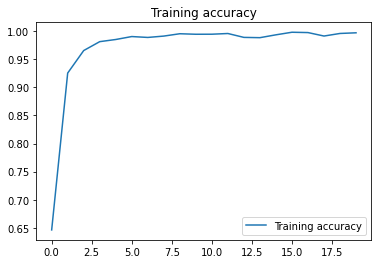

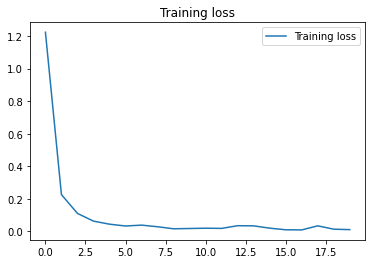

In [ ]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
#plt.plot(epochs, val_acc, label='Validation accuracy')
#plt.title('Training and validation accuracy')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
#plt.plot(epochs, val_loss, label='Validation loss')
#plt.title('Training and validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

# 評估模型

In [1]:
#測試
loss, score = model.evaluate(x_test_np, y_test1)

# 輸出結果
print("score:",score)

NameError: ignored

In [ ]:
def predict_prob(number):
  return [number[0],1-number[0]]

y_prob = np.array(list(map(predict_prob, model.predict(x_test_np))))
y_prob 

array([[0.09487304, 0.90512696],
       [0.26310891, 0.73689109],
       [0.0069013 , 0.9930987 ],
       ...,
       [0.27989647, 0.72010353],
       [0.10920352, 0.89079648],
       [0.0189662 , 0.9810338 ]])

In [ ]:
y_predict = model.predict(x_test_np)
print("Ans:",np.argmax(predict[0]),np.argmax(predict[1]),np.argmax(predict[2]),np.argmax(predict[3]))
predict2 = model.predict_classes(x_test_np)
print("predict_classes:",predict2)
print("y_test",y_test1[:])


#保存模型架構
#with open("model.json", "w") as json_file:
#   json_file.write(model.to_json())
#保存模型權重
#model.save_weights("model-cifar-10.h5")

Ans: 10 5 15 5


AttributeError: ignored

In [ ]:
# 模型 儲存 Model Save 
model.save('/content/drive/MyDrive/Colab_Notebooks/chinese_mnist_project/chinese_mnist_v4.h5') #確認是哪個model
#好的結果不要不小心被覆蓋了!
#請存成.h5的格式!!!

#Analysis

In [ ]:
import tensorflow.keras.models

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_a = load_model('/content/drive/MyDrive/Colab_Notebooks/chinese_mnist_project/chinese_mnist_v4.h5')

In [ ]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 16)                567156    
Total params: 567,156
Trainable params: 567,156
Non-trainable params: 0
_________________________________________________________________


#二次訓練

In [ ]:
!pwd 


/content/drive/My Drive/Colab_Notebooks/chinese_mnist_project/input/data/data/data


In [ ]:
#二次訓練才用到
eta = 0.001 #0.001
loss = 'categorical_crossentropy'   # binary_crossentropy / mse  
import tensorflow as tf
from tensorflow.keras import optimizers
opt = optimizers.Adam(lr=eta, beta_1=0.9, beta_2=0.999, epsilon=1e-07) 
#opt = optimizers.SGD(lr=eta, momentum=0.9) #/optimizers.Adam(lr=eta, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#opt = optimizers.RMSprop(lr=eta)
epoch = 30
model.compile( loss=loss,
        optimizer=opt,
        metrics=['accuracy'])

In [ ]:
ls

input_100_10_10.jpg  input_31_8_12.jpg   input_54_5_15.jpg   input_77_2_3.jpg
input_100_10_11.jpg  input_31_8_13.jpg   input_54_5_1.jpg    input_77_2_4.jpg
input_100_10_12.jpg  input_31_8_14.jpg   input_54_5_2.jpg    input_77_2_5.jpg
input_100_10_13.jpg  input_31_8_15.jpg   input_54_5_3.jpg    input_77_2_6.jpg
input_100_10_14.jpg  input_31_8_1.jpg    input_54_5_4.jpg    input_77_2_7.jpg
input_100_10_15.jpg  input_31_8_2.jpg    input_54_5_5.jpg    input_77_2_8.jpg
input_100_10_1.jpg   input_31_8_3.jpg    input_54_5_6.jpg    input_77_2_9.jpg
input_100_10_2.jpg   input_31_8_4.jpg    input_54_5_7.jpg    input_7_7_2.jpg
input_100_10_3.jpg   input_31_8_5.jpg    input_54_5_8.jpg    input_77_3_10.jpg
input_100_10_4.jpg   input_31_8_6.jpg    input_54_5_9.jpg    input_77_3_11.jpg
input_100_10_5.jpg   input_31_8_7.jpg    input_5_4_5.jpg     input_77_3_12.jpg
input_100_10_6.jpg   input_31_8_8.jpg    input_54_6_10.jpg   input_77_3_13.jpg
input_100_10_7.jpg   input_31_8_9.jpg    input_54_6_11.jpg   

In [ ]:
from tensorflow.keras.models import load_model
model.load_weights('./chinese_mnist_v3.h5')

OSError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_generator = test_datagen.flow(
        x_test_np,
        y_test1,
        batch_size=len(x_test_np),
        shuffle=True)

In [ ]:
y_predict = model_a.predict(test_generator[0][0])#, steps = 1)
y_predict 

array([[4.1023876e-14, 6.1955485e-18, 6.9118051e-14, ..., 3.3552826e-15,
        7.2542638e-15, 3.7531332e-11],
       [2.5329290e-09, 1.3869514e-13, 2.1152453e-04, ..., 1.0930215e-04,
        1.1452548e-06, 7.5270699e-11],
       [3.1942588e-28, 5.6243073e-20, 3.6250460e-33, ..., 1.0000000e+00,
        6.4971810e-15, 8.9999039e-19],
       ...,
       [6.1129733e-15, 3.2232861e-06, 3.9732380e-15, ..., 6.8802997e-02,
        2.3355271e-08, 2.4118766e-08],
       [1.3578357e-15, 4.8382263e-16, 1.5292970e-14, ..., 9.9999917e-01,
        1.1019133e-09, 9.0216395e-15],
       [8.1627191e-19, 2.2990282e-21, 3.6632464e-19, ..., 1.6736572e-04,
        1.1414322e-13, 1.3165537e-22]], dtype=float32)

In [ ]:
y_predict_argmax = np.argmax(y_predict, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(test_generator[0][1], axis=1), y_predict_argmax)
cm

array([[ 97,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,  99,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,   0],
       [  0,   0,   2, 108,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,  85,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 103,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  91,   1,   0,   0,   0,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1, 109,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,  91,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90,   0,   8,
       

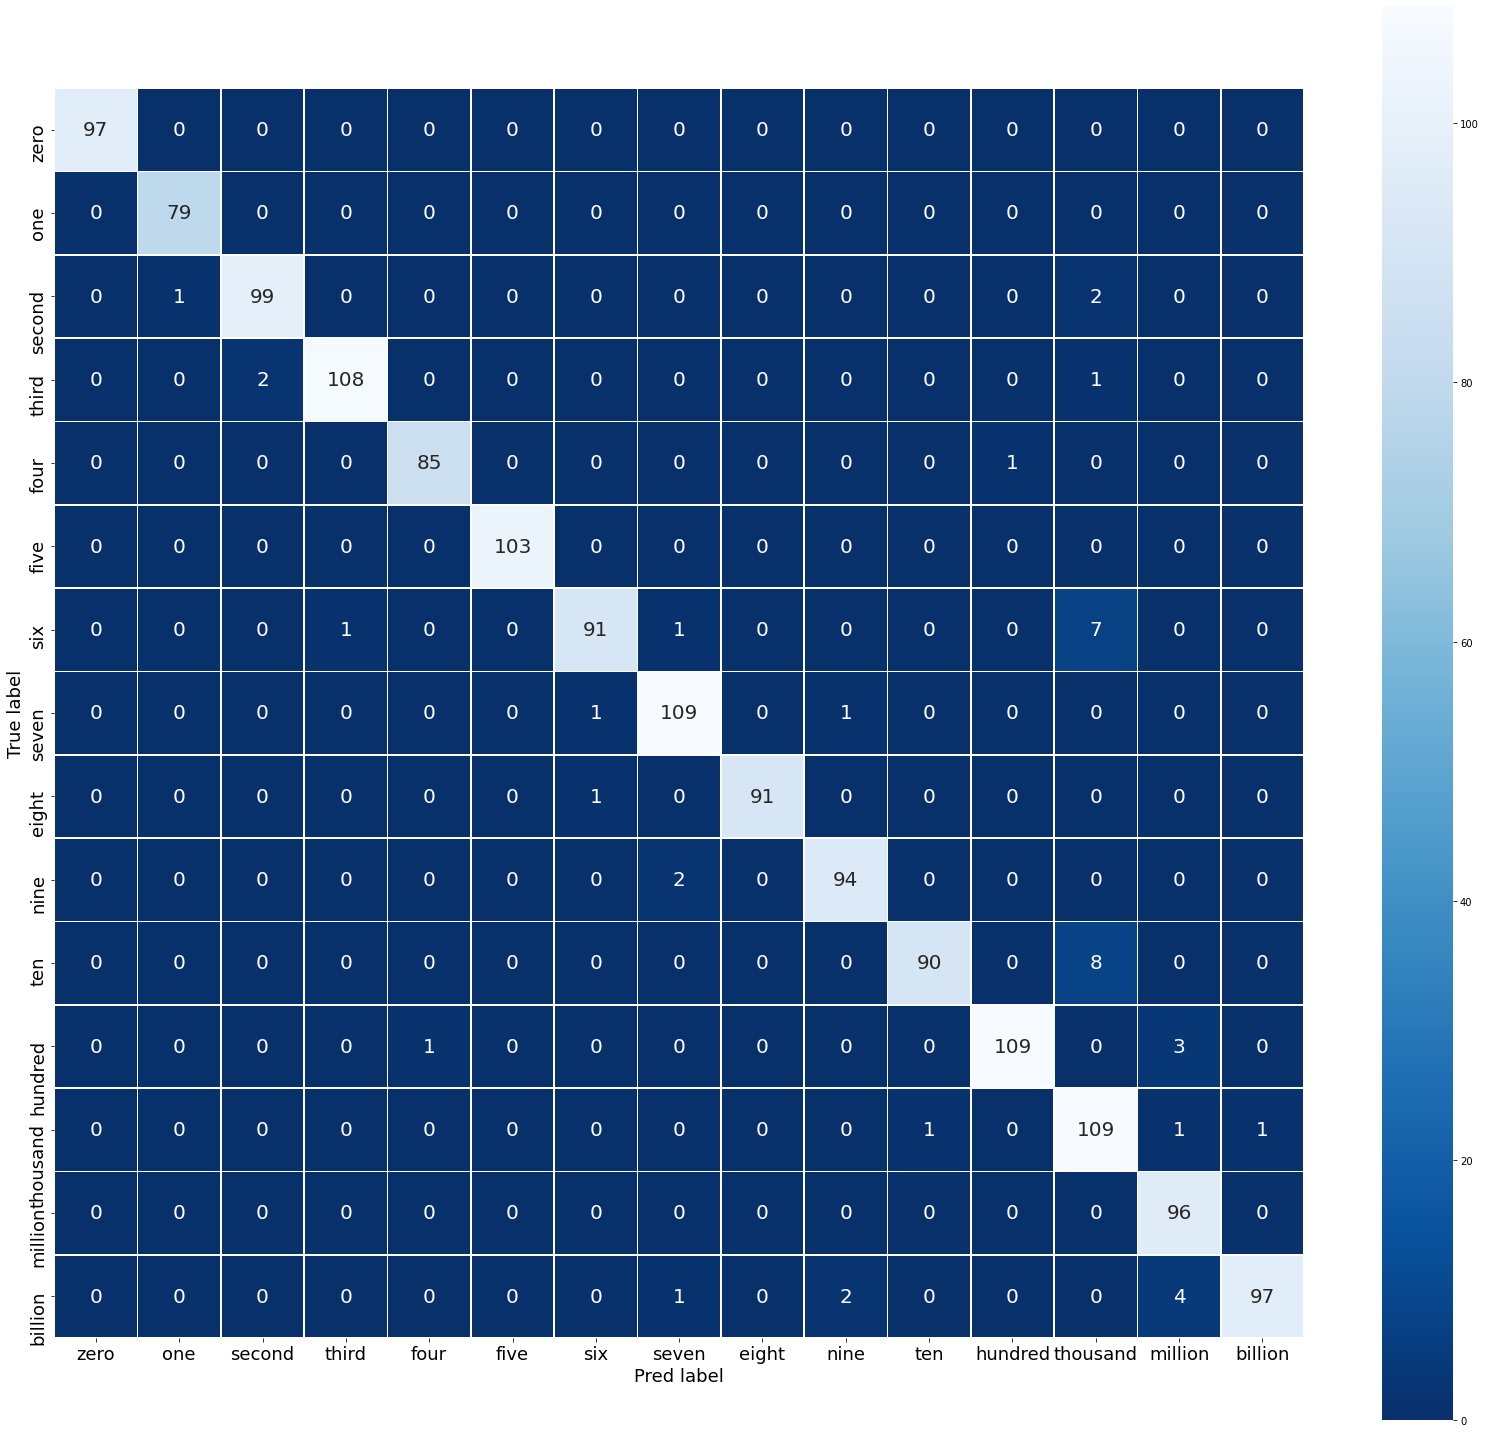

In [ ]:
import seaborn as sns
import pandas as pd

target_names = ['zero', 'one', 'second', 'third', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', 'million', 'billion']# 改你的label name
conf_m = pd.DataFrame(cm,
            index = target_names,
            columns = target_names)
fig, ax = plt.subplots(figsize = (28, 26))# 調整大小

sns.heatmap(conf_m, annot=True, annot_kws={"size": 20},
            cmap='Blues_r', fmt='g', linewidth=0.5, square=True)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Pred label', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predict_argmax, target_names=target_names)
print(report)

              precision    recall  f1-score   support

        zero       0.02      0.02      0.02        97
         one       0.06      0.06      0.06        79
      second       0.07      0.07      0.07       102
       third       0.09      0.09      0.09       111
        four       0.10      0.10      0.10        86
        five       0.12      0.12      0.12       103
         six       0.08      0.07      0.07       100
       seven       0.06      0.06      0.06       111
       eight       0.04      0.04      0.04        92
        nine       0.04      0.04      0.04        96
         ten       0.11      0.10      0.11        98
     hundred       0.05      0.05      0.05       113
    thousand       0.09      0.11      0.10       112
     million       0.04      0.04      0.04        96
     billion       0.11      0.11      0.11       104

    accuracy                           0.07      1500
   macro avg       0.07      0.07      0.07      1500
weighted avg       0.07   

---

# Export test set result in csv

In [ ]:
df_result = pd.DataFrame(columns=["case", 'predict'])

In [ ]:
picture1 = []
for i in range(len(x_test)):
    picture1.append(x_test[i])

In [ ]:
df_result['case'] = picture1
df_result['predict'] = y_predict_argmax
df_result

,case,predict
0,input_7_4_7.jpg,9
1,input_100_7_4.jpg,11
2,input_35_10_8.jpg,13
3,input_14_8_4.jpg,11
4,input_1_5_5.jpg,1
...,...,...
1495,input_70_4_7.jpg,15
1496,input_6_1_1.jpg,13
1497,input_85_5_6.jpg,12
1498,input_11_7_6.jpg,13


In [ ]:
df_result.to_csv('result_test.csv', encoding='utf-8')